In [1]:
cd ..

/Users/deepakduggirala/Documents/autonomous-robotics/translating-images-into-maps


In [2]:
%matplotlib inline

In [3]:
import numpy as np

import matplotlib.pyplot as plt

from pathlib import Path

import pandas as pd

28000 - trianing 
6000 - validation

In [10]:
def read_ious(fname, token):
    with open(fname) as f:
        val_iou = [l for l in f.read().split('\n') if l]
    iou_epochs = [''.join(l)[len(token)+1:-3].split() for l in val_iou if l.startswith(token)]
    ious = np.array([[float(iou) for iou in iou_epoch] for iou_epoch in iou_epochs])
    return ious

def plot_ious(train_ious, val_ious, val_interval):
    train_epochs = np.arange(1, train_ious.shape[0]+1)
    val_epochs = val_interval*np.arange(1, val_ious.shape[0]+1)
    
    n_cols, n_rows=3, 3
    fig, axs = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(10,10))

    for row in range(n_rows):
        for col in range(n_cols):
            i = row*n_cols + col
            ax = axs[row][col]
            ax.plot(train_epochs, train_ious[:,i], label='train')
            ax.plot(val_epochs, val_ious[:,i], label='val')
            ax.set_title(classes_pred[i]+' iou')
            ax.legend()
    fig.tight_layout()
    
def read_loss(fname):
    with open(fname) as f:
        loss_txt = [l for l in f.read().split() if l]

    return np.array([[float(el) for el in l.split(',')[1:] if el] for l in loss_txt])

def plot_loss(train_loss, val_loss, val_interval):
    train_epochs = np.arange(1, train_loss.shape[0]+1)
    val_epochs = val_interval*np.arange(1, val_loss.shape[0]+1)
    plt.plot(train_epochs, train_loss[:,0], label='train')
    plt.plot(val_epochs, val_loss[:,0], label='val')
    plt.title('loss')
    plt.legend()

In [5]:
classes_pred=[
            "drivable_area",
            "ped_crossing",
            "walkway",
            "carpark_area",
            "bus",
            "bicycle",
            "car",
            "construction_vehicle",
            "motorcycle",
            "trailer",
            "truck",
            "pedestrian",
            "trafficcone",
            "barrier",
        ]
len(classes_pred)

14

## Experiment - 4
- Folder Name: tiim_full
- job id: 3159614

Params:
- trainset size - 5600 (data_size=0.2)
- batch_size - 8
- lr - 5e-5
- update after each batch (accumulation-steps=1)
- epochs - 10

Outcome:
- 700 mini-batches, 
- each mini-batch took 3.4 seconds
- time for 1 epoch - 45 min
- total run time: 7h30m
- Loss started with 3.78 ended at 2.5 (epoch=10)

- job id: 3159703 - epochs 11-20
- job id: 3160018 - epochs 21-40 (13h 40 m

In [28]:
val_interval = 5
dir_name = Path('experiments/tiim_full-exp4')


fname = dir_name / 'val_ious.txt'
val_s200_ious_per_class = read_ious(fname, 's200_ious_per_class: ')
val_s100_ious_per_class = read_ious(fname, 's100_ious_per_class: ')

fname = dir_name / 'train_ious.txt'
train_s100_ious_per_class = read_ious(fname, 's100_ious_per_class: ')

val_loss = read_loss(dir_name / 'val_loss.txt')
train_loss = read_loss(dir_name / 'train_loss.txt')

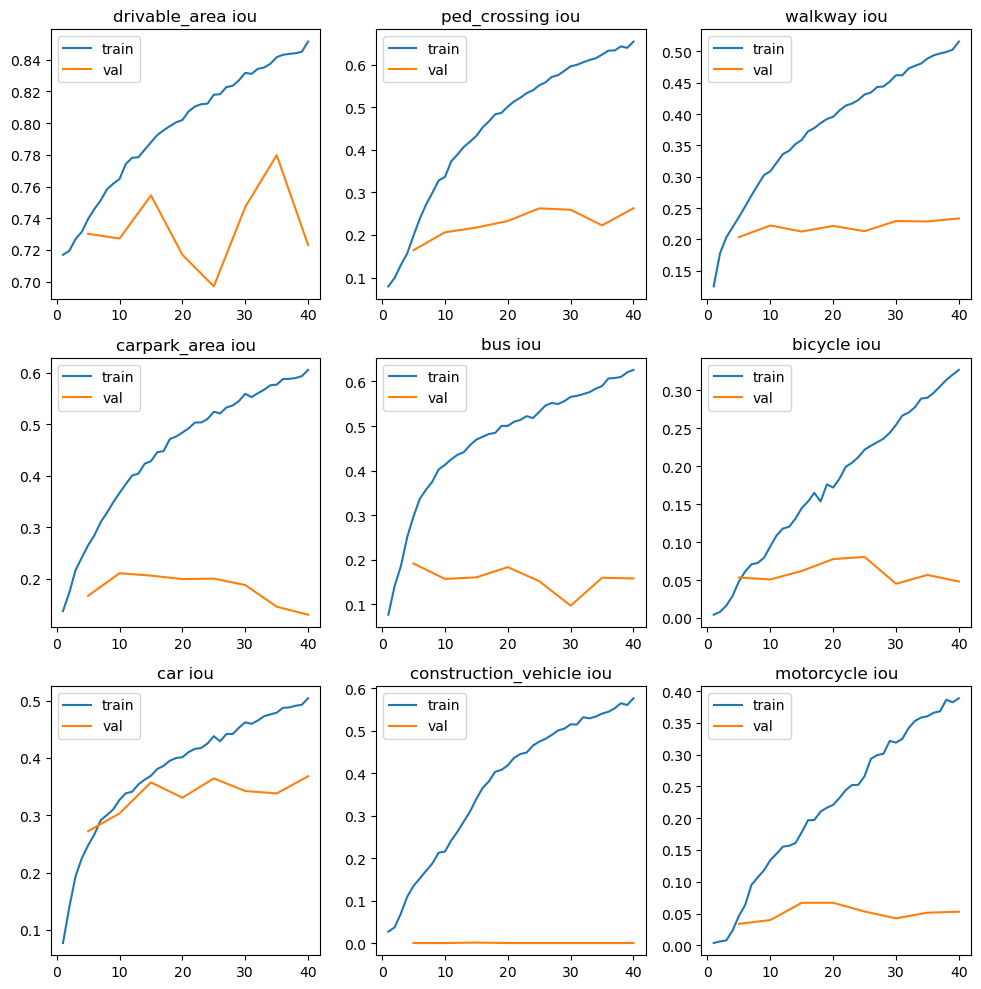

In [31]:
plot_ious(train_s100_ious_per_class, val_s100_ious_per_class, val_interval)

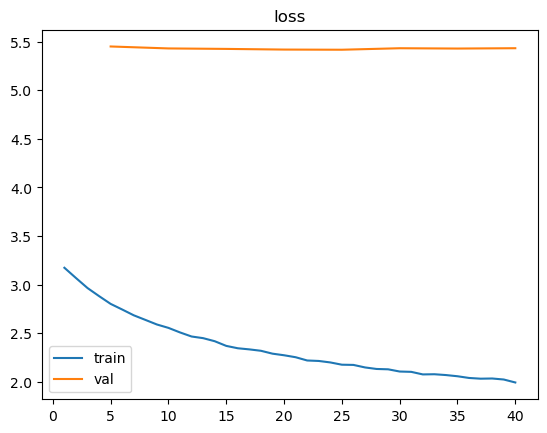

In [37]:
plot_loss(train_loss, val_loss, val_interval)

## Experiment-5

- Folder Name: tiim_full_b8_e10_pin
- job id: 3159621
- start time: 2022-12-02 21:41:35
- end time: 

Params:
- trainset size - 7000 (data_size=0.25)
- batch_size - 8
- lr - 1.25e-5
- update after each batch (accumulation-steps=1)
- epochs - 10
- added pin_memory=True to torch dataloaders

Outcome:
- 875 mini-batches, 
- each mini-batch took 3.25 seconds
- time for 1 epoch - 45 min
- total run time: 9h30m
- Loss started with 3.78 and ended at 2.25 (epoch=10)

- job id: 3159771 - epochs 11-20
- job id: 3160409 - epochs 21-40

In [43]:
val_interval = 5
dir_name = Path('experiments/tiim_full_b8_e10_pin-exp5')


fname = dir_name / 'val_ious.txt'
val_s200_ious_per_class = read_ious(fname, 's200_ious_per_class: ')
val_s100_ious_per_class = read_ious(fname, 's100_ious_per_class: ')

fname = dir_name / 'train_ious.txt'
train_s100_ious_per_class = read_ious(fname, 's100_ious_per_class: ')

val_loss = read_loss(dir_name / 'val_loss.txt')
train_loss = read_loss(dir_name / 'train_loss.txt')

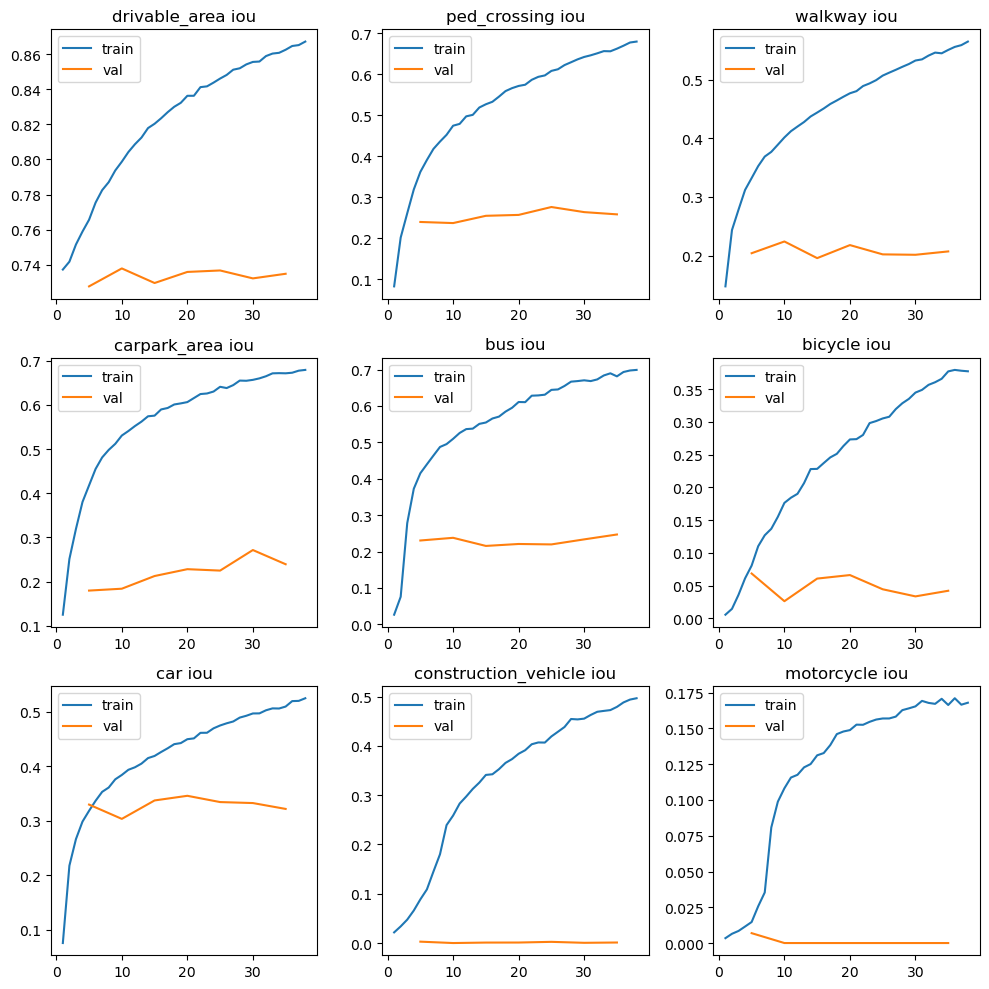

In [44]:
plot_ious(train_s100_ious_per_class, val_s100_ious_per_class, val_interval)

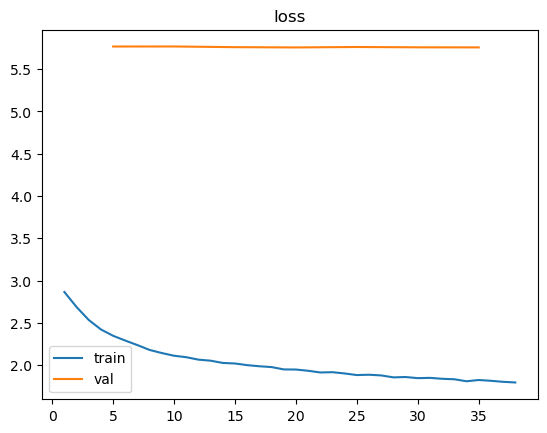

In [45]:
plot_loss(train_loss, val_loss, val_interval)

## Experiment - 6

- Folder Name: tiim_28k
- job id: 3160691
- start time: 2022-12-04 06:38
- end time: 2022-12-05 20:17 (epoch-10) (1 day 13 hours)

Params:
- trainset size - 28000 (data_size=1)
- batch_size - 8
- lr - 5e-5
- update after each batch (accumulation-steps=1)
- epochs - 10
- added pin_memory=True to torch dataloaders

Outcome:
- 3500 mini-batches, 
- each mini-batch took 3.5 seconds
- time for 1 epoch - 3h30 min
- total run time: 
- Loss started with 3.76

- job id: 3169297 - epochs 11-20
- job id: 3160409 - epochs 21-30


In [11]:
val_interval = 1
dir_name = Path('experiments/tiim_28k-exp6')


fname = dir_name / 'val_ious.txt'
val_s200_ious_per_class = read_ious(fname, 's200_ious_per_class: ')
val_s100_ious_per_class = read_ious(fname, 's100_ious_per_class: ')

fname = dir_name / 'train_ious.txt'
train_s100_ious_per_class = read_ious(fname, 's100_ious_per_class: ')

val_loss = read_loss(dir_name / 'val_loss.txt')
train_loss = read_loss(dir_name / 'train_loss.txt')

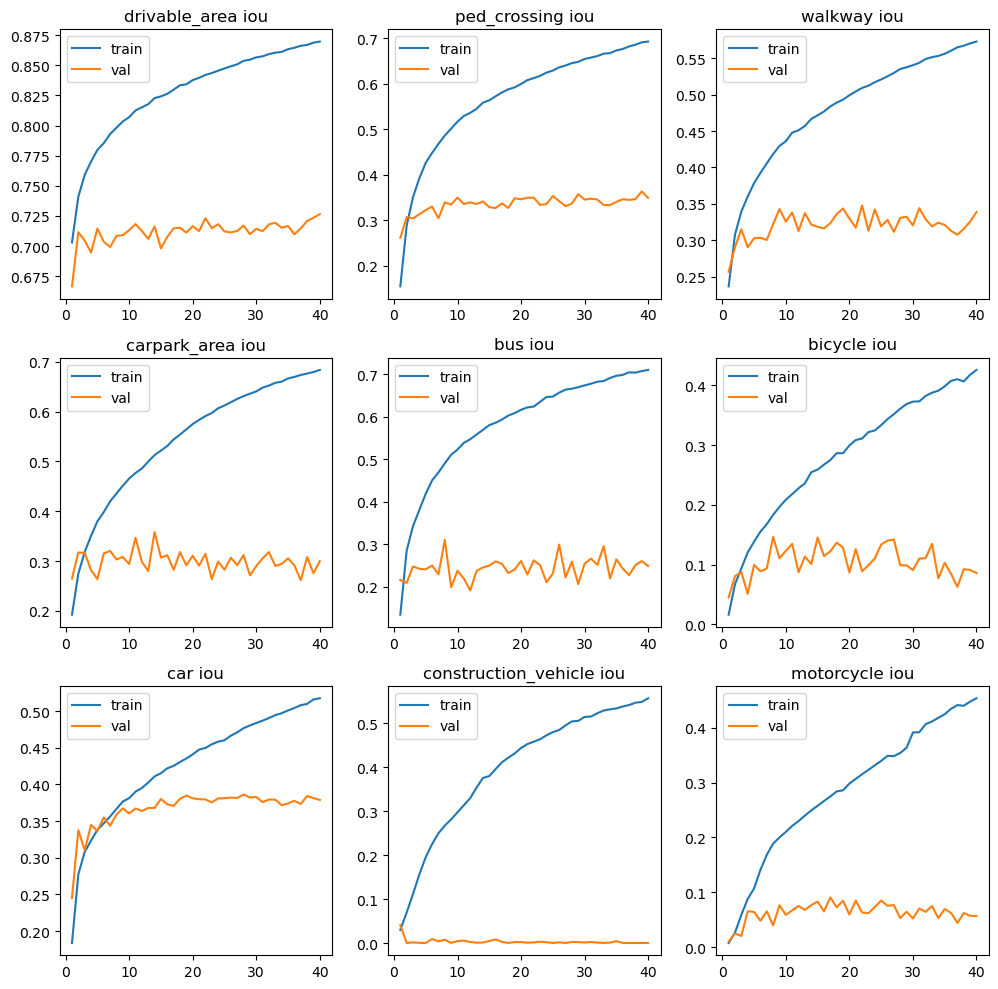

In [12]:
plot_ious(train_s100_ious_per_class, val_s100_ious_per_class, val_interval)

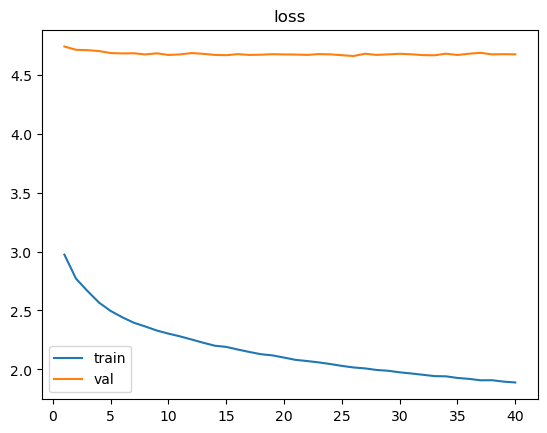

In [13]:
plot_loss(train_loss, val_loss, val_interval)

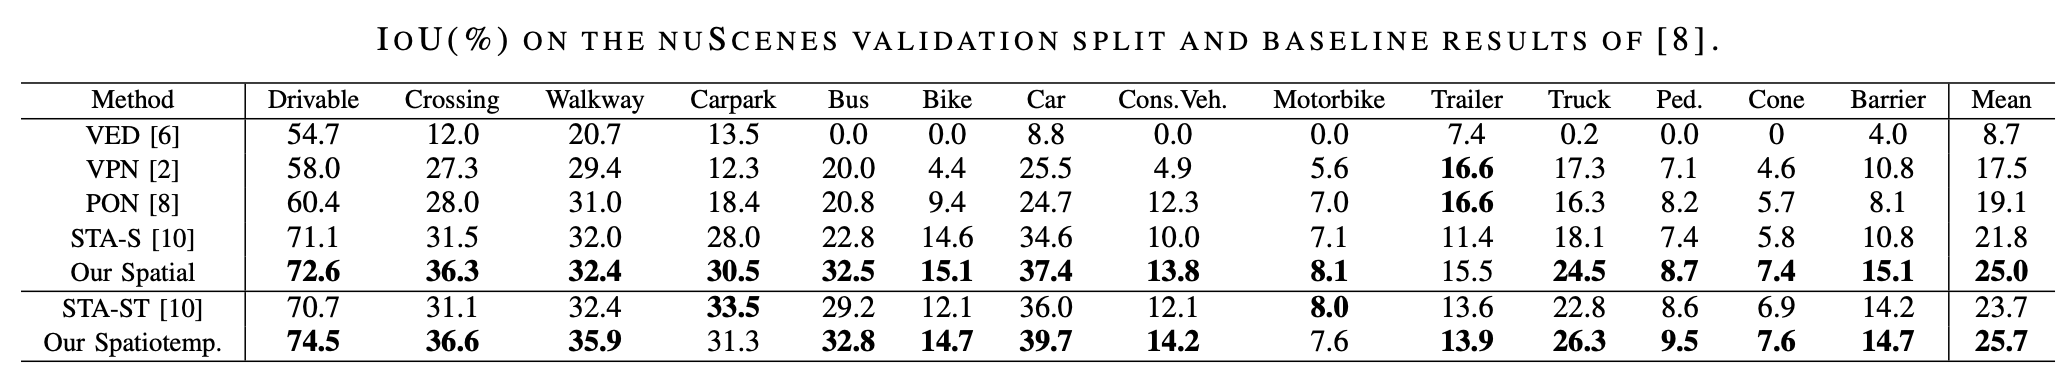

In [14]:
pd.Series(np.round(100*val_s200_ious_per_class[-1,:], 1), index=classes_pred)

drivable_area           73.4
ped_crossing            34.8
walkway                 33.4
carpark_area            29.5
bus                     24.4
bicycle                  6.9
car                     37.4
construction_vehicle     0.0
motorcycle               5.3
trailer                  9.7
truck                   19.7
pedestrian               8.5
trafficcone              5.6
barrier                 12.7
dtype: float64

In [21]:
np.mean(val_s200_ious_per_class[-1])

0.21534216453785712